<a href="https://colab.research.google.com/github/ViniciusKanh/AnemiaClassifierML/blob/main/AnemiaClassifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predição e Classificação de Tipos de Anemia Utilizando Modelos de Machine Learning**

## **Resumo**
O presente projeto tem como objetivo a aplicação de técnicas de machine learning para a predição e classificação de diferentes tipos de anemia a partir de dados clínicos. Através da utilização de algoritmos de aprendizado supervisionado, como Random Forest e Logistic Regression, será possível identificar padrões nos dados de exames laboratoriais e classificar os pacientes em diferentes categorias de anemia. Além disso, será realizada a avaliação dos modelos, levando em consideração métricas como acurácia, F1-Score e a matriz de confusão. O estudo visa oferecer uma solução tecnológica para auxiliar no diagnóstico e acompanhamento clínico de pacientes, contribuindo para a eficiência dos profissionais de saúde na tomada de decisões.

# Introdução

A anemia é uma condição médica caracterizada pela diminuição da quantidade de glóbulos vermelhos ou hemoglobina no sangue, afetando a capacidade de transporte de oxigênio no corpo. Existem diversos tipos de anemia, cada um com causas e características específicas, como a anemia ferropriva, a anemia megaloblástica e a anemia de células falciformes. A detecção precoce e precisa dessas condições é essencial para a implementação de tratamentos adequados.

Com o avanço da tecnologia, a inteligência artificial (IA) e, mais especificamente, os modelos de machine learning (ML), têm se mostrado ferramentas eficazes para a análise e predição de doenças. No caso da anemia, esses modelos podem ser utilizados para classificar diferentes tipos com base em exames laboratoriais, como a contagem de células sanguíneas. Este projeto explora a utilização desses modelos para prever e classificar tipos de anemia com base em um conjunto de dados de exames clínicos.

---

# Proposta

A proposta deste projeto é aplicar algoritmos de aprendizado supervisionado para classificar os tipos de anemia com base em um conjunto de dados clínicos. A classificação será realizada utilizando modelos como **Random Forest** e **Logistic Regression**.

A metodologia incluirá a pré-processamento e limpeza dos dados, a análise estatística das variáveis, e a utilização de validação cruzada para avaliar a performance dos modelos. Espera-se que o modelo de **Random Forest**, por sua robustez e capacidade de lidar com variáveis complexas, apresente os melhores resultados.

---

# Objetivos

## Objetivo Geral

Desenvolver um sistema de classificação de tipos de anemia utilizando técnicas de machine learning, com base em dados clínicos, a fim de prever o tipo de anemia de um paciente de maneira precisa e eficiente.

## Objetivos Específicos

1. **Pré-processamento dos dados:** Realizar a limpeza, normalização e balanceamento do conjunto de dados.
2. **Aplicação de técnicas de machine learning:** Utilizar os modelos **Random Forest** e **Logistic Regression** para classificar os tipos de anemia.
3. **Avaliação dos modelos:** Avaliar a performance dos modelos utilizando métricas como acurácia, F1-Score e a matriz de confusão.
4. **Comparação de resultados:** Comparar os resultados obtidos pelos diferentes modelos e escolher o mais adequado para a classificação de anemias.
5. **Validação do modelo:** Realizar validação cruzada para garantir a generalização do modelo.

---

# Metodologias

A metodologia do projeto será dividida em várias etapas principais:

## 1. Aquisição e Preparação dos Dados
O conjunto de dados utilizado neste projeto contém informações sobre exames clínicos, como a contagem de glóbulos vermelhos, hemoglobina, plaquetas, entre outros. O pré-processamento incluirá a eliminação de valores nulos e a identificação de outliers.

## 2. Desenvolvimento dos Modelos de Machine Learning
Serão treinados dois modelos de aprendizado supervisionado: **Random Forest** e **Logistic Regression**. Ambos os modelos serão avaliados e ajustados com o uso de validação cruzada para garantir que a performance seja consistente.

## 3. Avaliação e Comparação dos Modelos
A avaliação será feita utilizando as métricas de acurácia, F1-Score e matriz de confusão. Além disso, será analisada a importância das variáveis nos modelos, para entender quais características mais contribuem para a previsão do tipo de anemia.

## 4. Validação e Ajuste de Hiperparâmetros
O ajuste de hiperparâmetros será feito através de técnicas de otimização como **Grid Search** ou **Randomized Search**, visando melhorar a performance dos modelos. Será realizada uma comparação entre os modelos, e o modelo com melhor desempenho será selecionado.

## 5. Implementação e Testes Finais
Após o ajuste final dos parâmetros e a validação dos modelos, o sistema será testado com novos dados para garantir sua eficácia na predição do tipo de anemia de pacientes.


## Pré Processamento

In [1]:
from google.colab import files
import pandas as pd

# Upload do arquivo manualmente
uploaded = files.upload()

# Nome do arquivo carregado
filename = list(uploaded.keys())[0]

# Carregar a base de dados
df = pd.read_csv(filename)

# Exibir as primeiras linhas
df.head()

Saving AnemiaTypesClassification_data.csv to AnemiaTypesClassification_data.csv


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [2]:
import pandas as pd
import numpy as np

# Carregar a base de dados
df = pd.read_csv('AnemiaTypesClassification_data.csv')

# 1. Remover instâncias duplicadas
df_cleaned = df.drop_duplicates()

# 2. Remover valores nulos
df_cleaned = df_cleaned.dropna()

# Função para identificar e eliminar outliers
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar as instâncias que estão fora do intervalo
    return col[(col >= lower_bound) & (col <= upper_bound)]

# 3. Aplicando a remoção de outliers para cada variável numérica
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_no_outliers = df_cleaned.copy()

for col in numeric_cols:
    df_no_outliers[col] = remove_outliers(df_cleaned[col])

# Remover qualquer linha que tenha valores `NaN` após a remoção de outliers
df_no_outliers = df_no_outliers.dropna()

# Verificando a quantidade de registros após remoção de outliers
print(f'Número de linhas após remoção de outliers: {df_no_outliers.shape[0]}')

# Exibindo as primeiras linhas para verificar o processamento
df_no_outliers.head()

Número de linhas após remoção de outliers: 596


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
501,7.5,25.845,77.511,1.88076,5.14094,5.4,13.8,46.1526,92.0,30.0,32.0,320.0,13.0,0.26028,Healthy
502,8.5,25.845,77.511,1.88076,5.14094,5.1,13.5,46.1526,90.0,29.0,32.0,370.0,13.0,0.26028,Healthy
503,7.8,25.845,77.511,1.88076,5.14094,4.8,12.7,46.1526,86.0,29.0,33.0,290.0,14.9,0.26028,Normocytic normochromic anemia
504,8.7,25.845,77.511,1.88076,5.14094,5.7,14.9,46.1526,95.0,31.0,33.0,380.0,13.2,0.26028,Healthy
505,7.0,25.845,77.511,1.88076,5.14094,4.4,12.0,46.1526,87.0,28.0,32.0,260.0,14.5,0.26028,Normocytic normochromic anemia


In [3]:
# Verificar a distribuição das classes
diagnosis_counts = df_cleaned['Diagnosis'].value_counts(normalize=True)
# Mostrar a distribuição das classes em termos de proporção
diagnosis_counts

,proportion
Diagnosis,
Healthy,0.262175
Normocytic hypochromic anemia,0.219968
Normocytic normochromic anemia,0.206981
Iron deficiency anemia,0.149351
Thrombocytopenia,0.058442
Other microcytic anemia,0.045455
Leukemia,0.035714
Macrocytic anemia,0.012987
Leukemia with thrombocytopenia,0.008929


## Balanceamento dos Dados ( Smote )


In [ ]:
# Instalar o pacote imbalanced-learn (se necessário)
!pip install imbalanced-learn

# Importar as bibliotecas necessárias
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar a base de dados
df = pd.read_csv('AnemiaTypesClassification_data.csv')

# Separar os dados de features (X) e o target (y)
X = df.drop(columns=['Diagnosis'])  # Remover a coluna de target
y = df['Diagnosis']

# Codificar a variável target (Diagnosis) se necessário
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Aplicar SMOTE para balanceamento das classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y_encoded)

# Verificar a distribuição após o balanceamento
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_res).value_counts())

# Opcional: dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


Distribuição das classes após SMOTE:
5    336
1    336
7    336
2    336
0    336
8    336
6    336
3    336
4    336
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar a base de dados
df = pd.read_csv('AnemiaTypesClassification_data.csv')

# Separar os dados de features (X) e o target (y)
X = df.drop(columns=['Diagnosis'])  # Remover a coluna de target
y = df['Diagnosis']

# Opcional: dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Treinamento e Avaliação

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Acurácia média com Cross-Validation - Random Forest: 0.9867491488326848 ± 0.013152824921696586
Acurácia média com Cross-Validation - Logistic Regression: 0.590895549610895 ± 0.11174659743013506

Avaliação do modelo Random Forest:
Acurácia: 0.9948051948051948
F1-Score: 0.995405711298213
Relatório de classificação:
                                 precision    recall  f1-score   support

                       Healthy       1.00      1.00      1.00       120
        Iron deficiency anemia       1.00      1.00      1.00        52
                      Leukemia       1.00      1.00      1.00        10
Leukemia with thrombocytopenia       0.60      1.00      0.75         3
             Macrocytic anemia       1.00      1.00      1.00         2
 Normocytic hypochromic anemia       1.00      1.00      1.00        88
Normocytic normochromic anemia       1.00      0.99     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


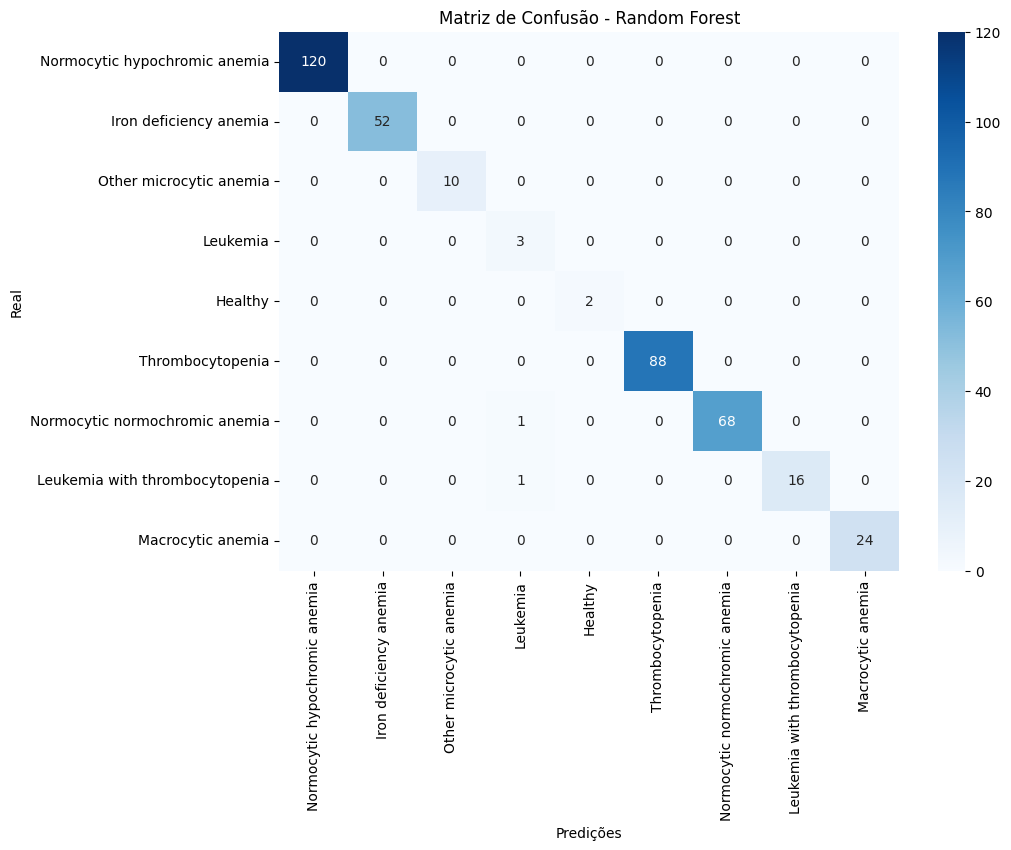

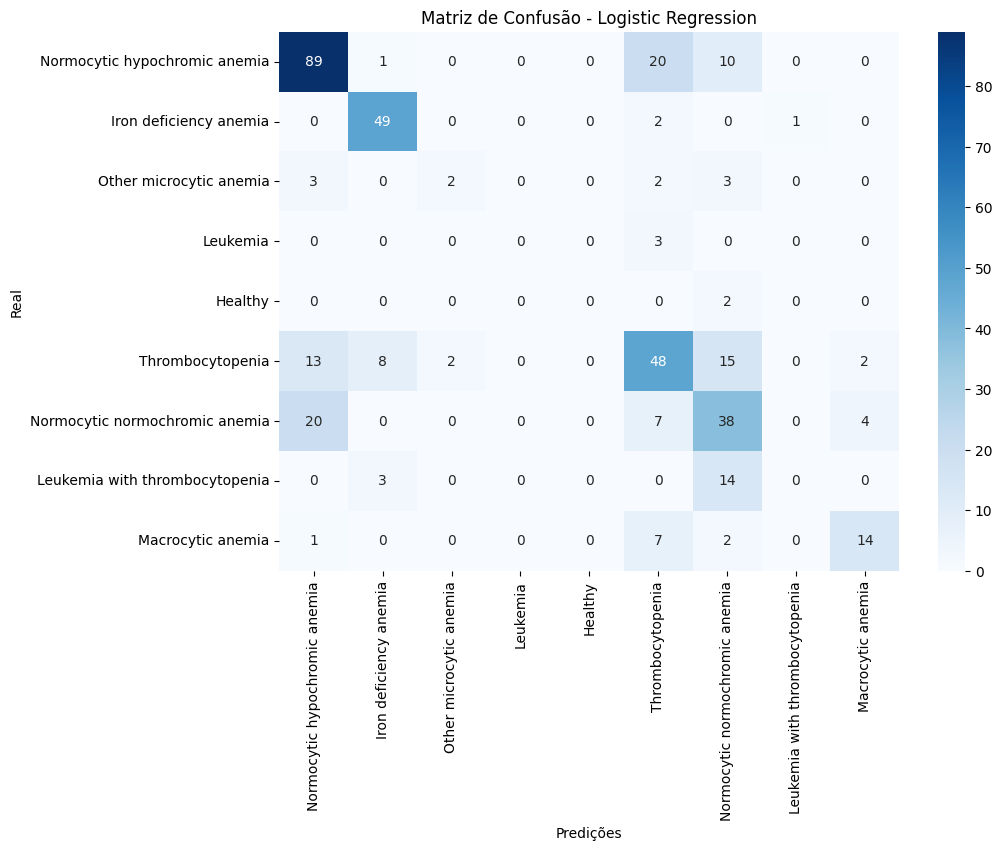

In [10]:
# Importando bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inicializando os modelos
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Ajuste de hiperparâmetros do Random Forest com GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Ajuste de hiperparâmetros para Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_logreg.fit(X_train, y_train)
best_logreg_model = grid_search_logreg.best_estimator_

# Avaliação com Cross-Validation
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
cv_scores_logreg = cross_val_score(best_logreg_model, X, y, cv=5, scoring='accuracy')

print(f"Acurácia média com Cross-Validation - Random Forest: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")
print(f"Acurácia média com Cross-Validation - Logistic Regression: {cv_scores_logreg.mean()} ± {cv_scores_logreg.std()}")

# Fazendo previsões com os melhores modelos
y_pred_rf = best_rf_model.predict(X_test)
y_pred_logreg = best_logreg_model.predict(X_test)

# Avaliação do modelo Random Forest
print("\nAvaliação do modelo Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print("Relatório de classificação:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Avaliação do modelo Logistic Regression
print("\nAvaliação do modelo Logistic Regression:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print("Relatório de classificação:\n", classification_report(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plotando a matriz de confusão para Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=df['Diagnosis'].unique(), yticklabels=df['Diagnosis'].unique())
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

# Plotando a matriz de confusão para Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=df['Diagnosis'].unique(), yticklabels=df['Diagnosis'].unique())
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()


### Ajustar o Modelo Random Forest para Evitar Overfitting

In [11]:
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
rf_model = RandomForestClassifier(random_state=42)

# Definindo os parâmetros a serem ajustados
param_grid = {
    'n_estimators': [100, 200, 300],  # número de árvores
    'max_depth': [5, 10, 15, None],    # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],   # número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]      # número mínimo de amostras em um nó folha
}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustando o modelo
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Melhor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Avaliando o modelo ajustado
y_pred_rf_best = best_rf_model.predict(X_test)
print("Acurácia do modelo Random Forest com parâmetros ajustados:", accuracy_score(y_test, y_pred_rf_best))
print(f"F1-Score: {f1_score(y_test, y_pred_rf_best, average='weighted')}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Acurácia do modelo Random Forest com parâmetros ajustados: 0.9896103896103896
F1-Score: 0.9892130325814535


### Testar Modelos Alternativos (XGBoost, SVM, etc.)

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Inicializando o modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Codificar a variável target (Diagnosis)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Treinando o modelo
xgb_model.fit(X_train, y_train_encoded)

# Fazendo previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação
print("Avaliação do modelo XGBoost:")
print(f"Acurácia: {accuracy_score(y_test_encoded, y_pred_xgb)}")
print(f"F1-Score: {f1_score(y_test_encoded, y_pred_xgb, average='weighted')}")
print("Relatório de classificação:\n", classification_report(y_test_encoded, y_pred_xgb))

Avaliação do modelo XGBoost:
Acurácia: 0.9896103896103896
F1-Score: 0.9900952846885333
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       1.00      0.98      0.99        52
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        88
           6       1.00      1.00      1.00        69
           7       0.81      1.00      0.89        17
           8       1.00      1.00      1.00        24

    accuracy                           0.99       385
   macro avg       0.98      1.00      0.99       385
weighted avg       0.99      0.99      0.99       385



### Ajustar o Modelo de Regressão Logística

In [14]:
from sklearn.linear_model import LogisticRegression

# Ajuste do modelo Logistic Regression com regularização
logreg_model = LogisticRegression(max_iter=2000, random_state=42, solver='lbfgs', C=0.5)

# Treinando o modelo
logreg_model.fit(X_train, y_train)

# Previsões
y_pred_logreg = logreg_model.predict(X_test)

# Avaliação
print("Avaliação do modelo Logistic Regression:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print("Relatório de classificação:\n", classification_report(y_test, y_pred_logreg))


Avaliação do modelo Logistic Regression:
Acurácia: 0.7012987012987013
F1-Score: 0.692697486515932
Relatório de classificação:
                                 precision    recall  f1-score   support

                       Healthy       0.76      0.84      0.80       120
        Iron deficiency anemia       0.79      0.85      0.81        52
                      Leukemia       0.60      0.30      0.40        10
Leukemia with thrombocytopenia       1.00      0.67      0.80         3
             Macrocytic anemia       0.00      0.00      0.00         2
 Normocytic hypochromic anemia       0.75      0.56      0.64        88
Normocytic normochromic anemia       0.57      0.74      0.65        69
       Other microcytic anemia       0.36      0.24      0.29        17
              Thrombocytopenia       0.70      0.67      0.68        24

                      accuracy                           0.70       385
                     macro avg       0.61      0.54      0.56       385
       

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  Tentar Outras Técnicas de Balanceamento

In [15]:
from imblearn.over_sampling import ADASYN

# Usando ADASYN para balancear as classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train, y_train)

import numpy as np

# Verificando a distribuição das classes após ADASYN
unique, counts = np.unique(y_res_adasyn, return_counts=True)
print("Distribuição das classes após ADASYN:")
for label, count in zip(unique, counts):
    print(f"Classe {label}: {count} amostras")

# Repetir treinamento e avaliação com o modelo Random Forest ou outro modelo
rf_model.fit(X_res_adasyn, y_res_adasyn)
y_pred_rf_adasyn = rf_model.predict(X_test)
print("Acurácia do modelo Random Forest com ADASYN:", accuracy_score(y_test, y_pred_rf_adasyn))


Distribuição das classes após ADASYN:
Classe Healthy: 216 amostras
Classe Iron deficiency anemia: 137 amostras
Classe Leukemia: 37 amostras
Classe Leukemia with thrombocytopenia: 218 amostras
Classe Macrocytic anemia: 16 amostras
Classe Normocytic hypochromic anemia: 191 amostras
Classe Normocytic normochromic anemia: 200 amostras
Classe Other microcytic anemia: 42 amostras
Classe Thrombocytopenia: 49 amostras
Acurácia do modelo Random Forest com ADASYN: 0.9844155844155844


### Considerar Redução de Dimensionalidade (PCA)

In [16]:
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade com PCA
pca = PCA(n_components=10)  # Escolher um número adequado de componentes
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Treinando o modelo Random Forest com PCA
rf_model.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model.predict(X_test_pca)
print("Acurácia do modelo Random Forest com PCA:", accuracy_score(y_test, y_pred_rf_pca))


Acurácia do modelo Random Forest com PCA: 0.8701298701298701


## Classificação e Avaliação


Distribuição das classes antes de balanceamento:
Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Avaliação do modelo Random Forest:
Acurácia: 0.9948051948051948
F1-Score: 0.9947592554439459
Relatório de classificação (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      1.00      1.00        52
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        88
           6       1.00      0.99      0.99        69
           7       1.00      1.00      1.00        17
           8       0.96      1.00      0.98        24

    accuracy                           0.99       385
   macro avg       0.99      0.99      0.99       385
weighted avg       0.99      0.99      0.99       385


Avaliação do modelo Logistic Regression:
Acurácia: 0.6935064935064935
F1-Score: 0.68540777141375
Relatório de classificação (Logistic Regression):
        

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Acurácia média com Cross-Validation - Logistic Regression: 0.6752462305447471


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Acurácia do modelo Random Forest com parâmetros ajustados: 0.9743365281737035


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Melhores parâmetros para Logistic Regression: {'C': 0.5, 'solver': 'lbfgs'}
Acurácia do modelo Logistic Regression com parâmetros ajustados: 0.7332757214578048


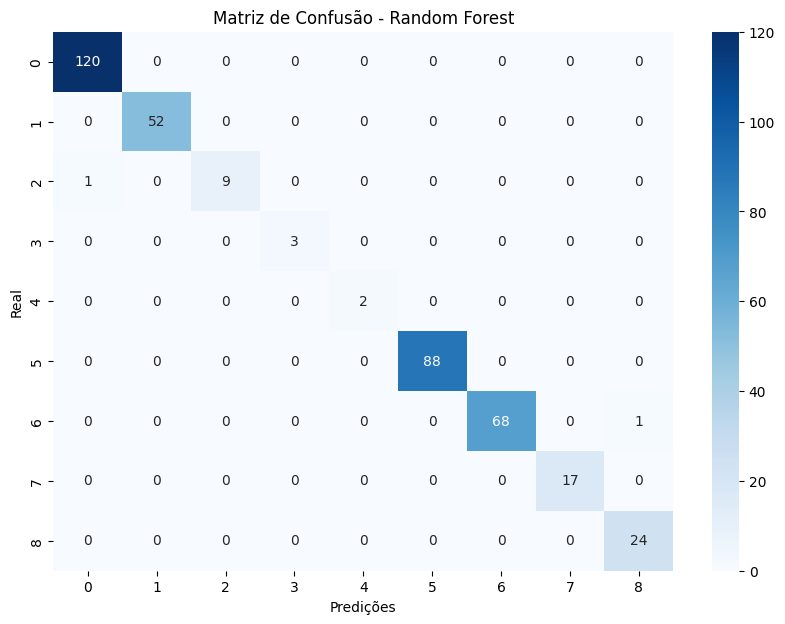

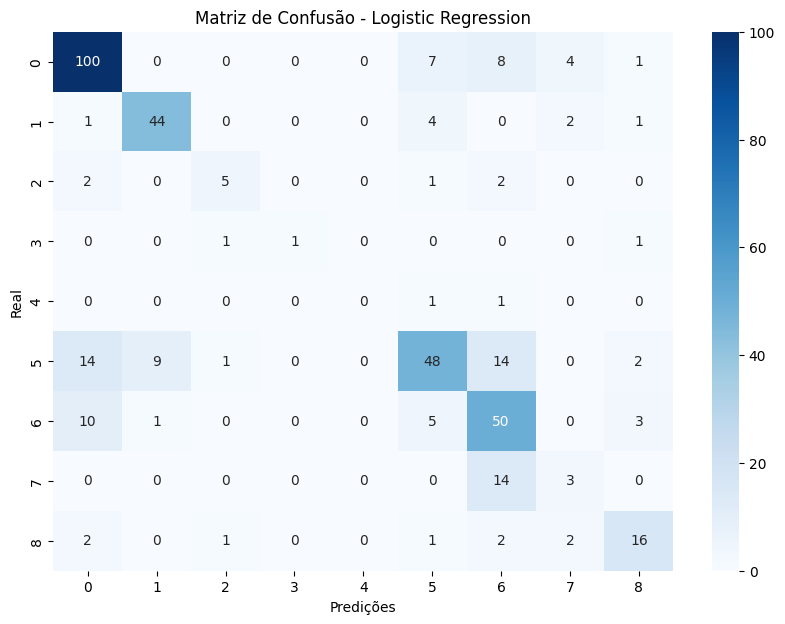

In [18]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Supondo que a base de dados já tenha sido carregada e tratada
# Aqui estou considerando que a base já foi limpa, com variáveis normalizadas e outliers removidos.

# Divisão entre variáveis independentes e target
X = df.drop(['Diagnosis'], axis=1)  # Variáveis independentes
y = df['Diagnosis']  # Target

# Codificar a variável target (Diagnosis) se necessário
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Verificando a distribuição das classes antes de balancear
print("\nDistribuição das classes antes de balanceamento:")
print(y.value_counts())

# Dividindo a base de dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Inicializando os modelos
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Treinando o modelo Random Forest
rf_model.fit(X_train, y_train)

# Treinando o modelo Logistic Regression
logreg_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)

# Avaliando o modelo Random Forest
print("\nAvaliação do modelo Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print("Relatório de classificação (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Avaliando o modelo Logistic Regression
print("\nAvaliação do modelo Logistic Regression:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_logreg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg, average='weighted')}")
print("Relatório de classificação (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

# Realizando Cross-validation para Random Forest
cv_rf = cross_val_score(rf_model, X, y_encoded, cv=5, scoring='accuracy')
print(f"\nAcurácia média com Cross-Validation - Random Forest: {cv_rf.mean()}")

# Realizando Cross-validation para Logistic Regression
cv_logreg = cross_val_score(logreg_model, X, y_encoded, cv=5, scoring='accuracy')
print(f"\nAcurácia média com Cross-Validation - Logistic Regression: {cv_logreg.mean()}")

# Ajustando hiperparâmetros do Random Forest usando GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print(f"\nMelhores parâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Acurácia do modelo Random Forest com parâmetros ajustados: {grid_search_rf.best_score_}")

# Ajustando hiperparâmetros do Logistic Regression usando GridSearch
param_grid_logreg = {
    'C': [0.1, 0.5, 1],
    'solver': ['lbfgs', 'liblinear'],
}

grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
print(f"\nMelhores parâmetros para Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Acurácia do modelo Logistic Regression com parâmetros ajustados: {grid_search_logreg.best_score_}")

# Exibindo as matrizes de confusão para os modelos
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plotando a matriz de confusão para Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues') # Removed xticklabels and yticklabels to avoid error
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

# Plotando a matriz de confusão para Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues') # Removed xticklabels and yticklabels to avoid error
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Predições")
plt.ylabel("Real")
plt.show()

## Ambiente de Produção


In [19]:
import pandas as pd

# Criando um exemplo de paciente saudável com valores típicos para cada variável
new_data = pd.DataFrame({
    'WBC': [7.0],  # Contagem de leucócitos (dentro da faixa normal)
    'LYMp': [25.0],  # Percentual de linfócitos (dentro da faixa normal)
    'NEUTp': [60.0],  # Percentual de neutrófilos (dentro da faixa normal)
    'LYMn': [1.8],  # Contagem de linfócitos no sangue (dentro da faixa normal)
    'NEUTn': [3.0],  # Contagem de neutrófilos no sangue (dentro da faixa normal)
    'RBC': [4.5],  # Contagem de glóbulos vermelhos (dentro da faixa normal)
    'HGB': [13.5],  # Hemoglobina (dentro da faixa normal)
    'HCT': [45.0],  # Hematócrito (dentro da faixa normal)
    'MCV': [90.0],  # Volume médio das células vermelhas (dentro da faixa normal)
    'MCH': [30.0],  # Conteúdo médio de hemoglobina nas células (dentro da faixa normal)
    'MCHC': [34.0],  # Concentração média de hemoglobina (dentro da faixa normal)
    'PLT': [250.0],  # Contagem de plaquetas (dentro da faixa normal)
    'PDW': [14.0],  # Largura da distribuição plaquetária (dentro da faixa normal)
    'PCT': [0.25]  # Contagem plaquetária (dentro da faixa normal)
})

# Prevendo a classe do novo dado
prediction = rf_model.predict(new_data)

# Para entender o diagnóstico:
diagnostic = prediction[0]  # O diagnóstico predito será o valor na variável 'diagnostic'

# A classe '0' representa "Healthy" (Saudável)
diagnostic_label = 'Healthy' if diagnostic == 0 else 'Outros Diagnósticos'

# Exibindo o diagnóstico predito
print(f"Diagnóstico predito: {diagnostic_label}")


Diagnóstico predito: Healthy


In [20]:
import pandas as pd

# Paciente saudável
new_data_healthy = pd.DataFrame({
    'WBC': [1.0],   # Contagem normal de leucócitos
    'LYMp': [40.0],  # Percentual normal de linfócitos
    'NEUTp': [50.0],  # Percentual normal de neutrófilos
    'LYMn': [2.0],   # Contagem normal de linfócitos
    'NEUTn': [5.0],  # Contagem normal de neutrófilos
    'RBC': [5.0],    # Contagem normal de glóbulos vermelhos
    'HGB': [13.0],   # Hemoglobina normal
    'HCT': [40.0],   # Hematócrito normal
    'MCV': [50.0],   # Volume médio das células vermelhas normal
    'MCH': [28.0],   # Conteúdo médio de hemoglobina normal
    'MCHC': [32.0],  # Concentração média de hemoglobina normal
    'PLT': [400.0],  # Contagem normal de plaquetas
    'PDW': [13.0],   # Largura da distribuição plaquetária normal
    'PCT': [0.5]     # Contagem plaquetária normal
})

# Paciente menos saudável
new_data_less_healthy = pd.DataFrame({
    'WBC': [6.0],   # Contagem de leucócitos um pouco baixa
    'LYMp': [30.0],  # Percentual de linfócitos um pouco elevado
    'NEUTp': [60.0],  # Percentual de neutrófilos ligeiramente abaixo da faixa normal
    'LYMn': [2.0],   # Contagem de linfócitos normal
    'NEUTn': [5.0],  # Contagem de neutrófilos normal
    'RBC': [4.2],    # Contagem de glóbulos vermelhos ligeiramente baixa
    'HGB': [11.5],   # Hemoglobina levemente abaixo da faixa normal
    'HCT': [37.0],   # Hematócrito um pouco abaixo
    'MCV': [80.0],   # Volume médio das células vermelhas ligeiramente baixo
    'MCH': [26.0],   # Conteúdo médio de hemoglobina abaixo da faixa normal
    'MCHC': [31.0],  # Concentração média de hemoglobina normal
    'PLT': [300.0],  # Contagem de plaquetas ligeiramente elevada
    'PDW': [15.0],   # Largura da distribuição plaquetária um pouco mais alta
    'PCT': [0.3]     # Contagem plaquetária normal
})

# Paciente bem doente
new_data_sick = pd.DataFrame({
    'WBC': [3.0],   # Contagem de leucócitos baixa
    'LYMp': [15.0],  # Percentual de linfócitos elevado
    'NEUTp': [50.0],  # Percentual de neutrófilos alterado
    'LYMn': [1.0],   # Contagem de linfócitos muito baixa
    'NEUTn': [5.0],  # Contagem de neutrófilos normal
    'RBC': [3.0],    # Contagem de glóbulos vermelhos baixa
    'HGB': [7.0],    # Hemoglobina muito baixa
    'HCT': [22.0],   # Hematócrito muito baixo
    'MCV': [65.0],   # Volume médio das células vermelhas muito baixo
    'MCH': [20.0],   # Conteúdo médio de hemoglobina muito baixo
    'MCHC': [30.0],  # Concentração média de hemoglobina baixa
    'PLT': [450.0],  # Contagem de plaquetas alta
    'PDW': [16.0],   # Largura da distribuição plaquetária muito alta
    'PCT': [0.45]    # Contagem plaquetária alta
})

# Mapeamento entre os rótulos numéricos e os nomes dos diagnósticos
class_mapping = {
    0: 'Healthy',
    1: 'Normocytic hypochromic anemia',
    2: 'Iron deficiency anemia',
    3: 'Thrombocytopenia',
    4: 'Other microcytic anemia',
    5: 'Normocytic normochromic anemia',
    6: 'Leukemia',
    7: 'Macrocytic anemia',
    8: 'Leukemia with thrombocytopenia'
}

# Fazendo as previsões
prediction_healthy = rf_model.predict(new_data_healthy)
prediction_less_healthy = rf_model.predict(new_data_less_healthy)
prediction_sick = rf_model.predict(new_data_sick)

# Convertendo a classe numérica para o nome do diagnóstico
diagnostic_healthy = class_mapping[prediction_healthy[0]]
diagnostic_less_healthy = class_mapping[prediction_less_healthy[0]]
diagnostic_sick = class_mapping[prediction_sick[0]]

# Exibindo os diagnósticos preditos para os três pacientes
print(f"Diagnóstico predito para o paciente saudável: {diagnostic_healthy}")
print(f"Diagnóstico predito para o paciente menos saudável: {diagnostic_less_healthy}")
print(f"Diagnóstico predito para o paciente bem doente: {diagnostic_sick}")


Diagnóstico predito para o paciente saudável: Healthy
Diagnóstico predito para o paciente menos saudável: Normocytic normochromic anemia
Diagnóstico predito para o paciente bem doente: Normocytic hypochromic anemia
